
## Let's Build Our Next Model Using Fine Transfer Learning




In [2]:
from Helper import Helper

In [3]:
h = Helper("https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip")

[]
2 -- 0 at 10_food_classes_10_percent
10 -- 0 at 10_food_classes_10_percent/train
0 -- 75 at 10_food_classes_10_percent/train/sushi
0 -- 75 at 10_food_classes_10_percent/train/ice_cream
0 -- 75 at 10_food_classes_10_percent/train/steak
0 -- 75 at 10_food_classes_10_percent/train/fried_rice
0 -- 75 at 10_food_classes_10_percent/train/chicken_curry
0 -- 75 at 10_food_classes_10_percent/train/pizza
0 -- 75 at 10_food_classes_10_percent/train/grilled_salmon
0 -- 75 at 10_food_classes_10_percent/train/ramen
0 -- 75 at 10_food_classes_10_percent/train/hamburger
0 -- 75 at 10_food_classes_10_percent/train/chicken_wings
10 -- 0 at 10_food_classes_10_percent/test
0 -- 250 at 10_food_classes_10_percent/test/sushi
0 -- 250 at 10_food_classes_10_percent/test/ice_cream
0 -- 250 at 10_food_classes_10_percent/test/steak
0 -- 250 at 10_food_classes_10_percent/test/fried_rice
0 -- 250 at 10_food_classes_10_percent/test/chicken_curry
0 -- 250 at 10_food_classes_10_percent/test/pizza
0 -- 250 at 10_foo

In [4]:
class_names = h.get_classnames()

In [5]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

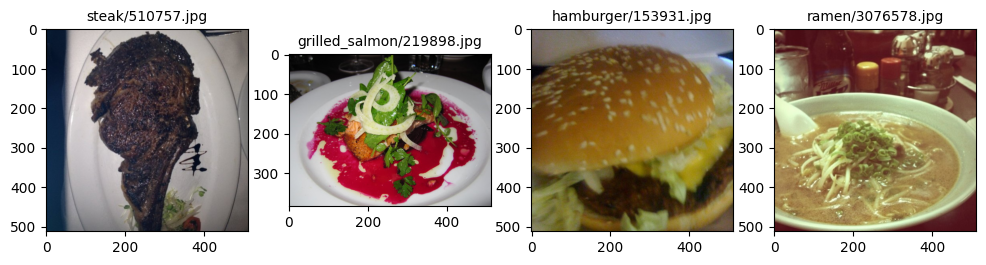

In [6]:
h.view_random_train_image()

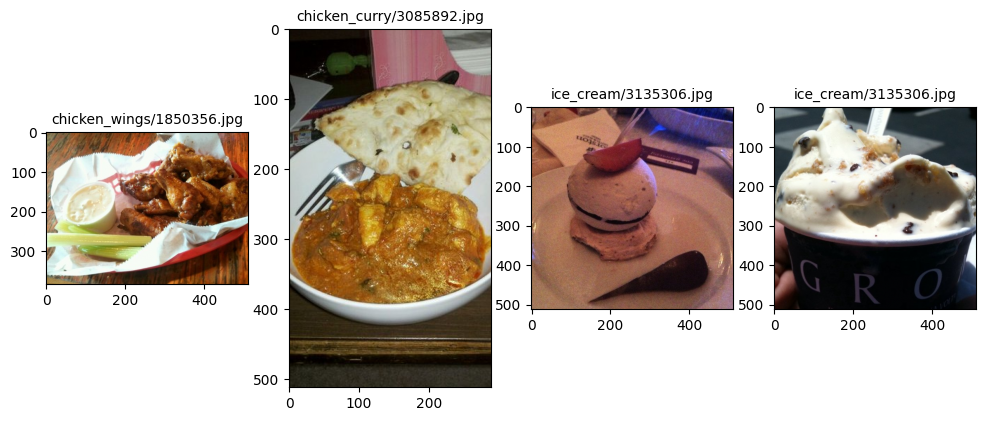

In [7]:
h.view_random_test_image()

In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [9]:
from tensorflow.keras.metrics import  Accuracy

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Import the data

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_data = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                         image_size = (224,224),
                                                         batch_size=32,
                                                         shuffle=True,
                                                         label_mode='categorical')

test_data = tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                       image_size = (224,224),
                                                       color_mode='rgb',
                                                       batch_size=32,
                                                       label_mode='categorical')



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [12]:
train_data, test_data

# None is the batch size

(<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>)

In [13]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [14]:
import matplotlib.pyplot as plt
for imgs, labels in train_data.take(2):
  print(imgs, labels)

tf.Tensor(
[[[[0.00000000e+00 9.71428585e+00 3.17142849e+01]
   [0.00000000e+00 9.92857170e+00 3.19285717e+01]
   [2.14285851e-01 7.78571415e+00 3.10000000e+01]
   ...
   [1.04999781e+01 1.02857141e+01 9.85718632e+00]
   [8.23978806e+00 9.23978806e+00 1.12397881e+01]
   [7.28571415e+00 8.28571415e+00 1.02857141e+01]]

  [[0.00000000e+00 9.71428585e+00 3.17142849e+01]
   [0.00000000e+00 9.92857170e+00 3.19285717e+01]
   [2.14285851e-01 7.78571415e+00 3.10000000e+01]
   ...
   [1.22295685e+01 1.20153046e+01 1.15867767e+01]
   [1.10663252e+01 1.10663252e+01 1.10663252e+01]
   [1.00000000e+01 1.10000000e+01 1.30000000e+01]]

  [[0.00000000e+00 9.71428585e+00 2.97142849e+01]
   [0.00000000e+00 9.92857170e+00 2.99285717e+01]
   [2.14285851e-01 7.78571415e+00 2.93367348e+01]
   ...
   [9.81118584e+00 9.42854977e+00 8.66327763e+00]
   [8.00000000e+00 8.00000000e+00 8.00000000e+00]
   [8.57146358e+00 8.57146358e+00 1.01428919e+01]]

  ...

  [[2.06219406e+02 2.26219406e+02 2.26790878e+02]
   [2

### Create a model using tensorflow applications

In [15]:
import datetime
def create_callbacks(dir_name, exp_name):
  '''
  Accepts:
    dir_name
    exp_name : where dumps the logs
  '''
  log_dir = dir_name + "/" + exp_name + "_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensor_callbacks = tf.keras.callbacks.TensorBoard(log_dir="./logs" )
  print(f"Dumping into the dir {log_dir}")
  return tensor_callbacks



In [17]:
tf.random.set_seed(42)

# Create a base model using tensorflow application
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)


base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3), name="Input Layer")

# Rescaling is pre-built in Efficientnet

x = base_model(inputs)

print(f"Input Shape after Base Model is {x.shape}")

# Apply GlobalAveragePooling to reduce the dimension

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

print(f"Input Shape after pooling is {x.shape}")

# Create Output Layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer') (x)

print(f"Output Shape is {outputs.shape}")

# Combine inputs and output with model

model0 = tf.keras.Model(inputs, outputs)

# Model Compilation

model0.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer = "adam",
               metrics=['accuracy'])

# Model Fitting
history0 = model0.fit(train_data,
                      epochs=10,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data),
                      callbacks=[create_callbacks("Efficientv2B0", "10_per_data")])

Input Shape after Base Model is (None, 7, 7, 1280)
Input Shape after pooling is (None, 1280)
Output Shape is (None, 10)
Dumping into the dir Efficientv2B0/10_per_data_20230825-053945
Epoch 1/10
24/24 [==============================] - 18s 402ms/step - loss: 1.8432 - accuracy: 0.4387 - val_loss: 1.3085 - val_accuracy: 0.7388
Epoch 2/10
24/24 [==============================] - 7s 290ms/step - loss: 1.1241 - accuracy: 0.7693 - val_loss: 0.8853 - val_accuracy: 0.8176
Epoch 3/10
24/24 [==============================] - 8s 295ms/step - loss: 0.8357 - accuracy: 0.8253 - val_loss: 0.7092 - val_accuracy: 0.8440
Epoch 4/10
24/24 [==============================] - 8s 335ms/step - loss: 0.6806 - accuracy: 0.8573 - val_loss: 0.6138 - val_accuracy: 0.8480
Epoch 5/10
24/24 [==============================] - 8s 340ms/step - loss: 0.5862 - accuracy: 0.8640 - val_loss: 0.5577 - val_accuracy: 0.8584
Epoch 6/10
24/24 [==============================] - 7s 290ms/step - loss: 0.5128 - accuracy: 0.8987 - val_

In [16]:
for layers_name, layers in mode